# Students Exam Performance - EDA

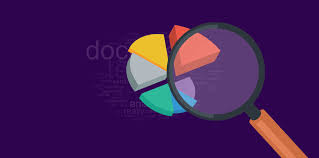

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")
df.head(5)

In [ ]:
df.columns = df.columns.str.replace(" " , "_" )
df.columns = df.columns.str.replace("/" , "_" )
df.rename(columns ={"parental_level_of_education":"parent_education"}, inplace = True)
df.head(5)


In [ ]:
df["Avg_total_score"] = (df.math_score + df.reading_score + df.writing_score ) / 3

In [ ]:
df.info()

In [ ]:
df.describe(include = "O")

In [ ]:
df.describe()

In [ ]:
for i in range(len(df.columns)):
    details = df[df.columns[i]].value_counts()
    i = i + 1
    print(details.head(1))

In [ ]:
df.columns

 Let's form a dataframe and check for Missing Values.

In [ ]:
def Missing_Values(df):
    mis_val = df.isnull().sum(0)
    mis_val_per = 100 * df.isnull().sum(0) / len(df)
    miss_val_df = pd.concat([mis_val , mis_val_per] , axis = 1)
    miss_val_df.rename(mapper = {0:"Missing_Values" , 1:"% of Missing Values"} , axis = "columns" , inplace = True)
    return miss_val_df

In [ ]:
Missing_Values(df)

# Visualizing the dataset step by step.

In [ ]:
gender = df.gender.value_counts()
race = df.race_ethnicity.value_counts()
parent_education_level = df.parent_education.value_counts()
lunch = df.lunch.value_counts()
test_prep = df.test_preparation_course.value_counts()

In [ ]:
plt.style.use("fivethirtyeight")

fig , (ax1 , ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (10, 6) , facecolor = "w")

ax1.pie(x = gender, labels = gender.index ,shadow = True, colors = ["#008fd5",'#fc4f30'] ,  wedgeprops= {'edgecolor':'k' } , 
        startangle = 45 , autopct = "%1.2f%%")
ax1.set_title("Student Gender Ratio")


ax2.bar(x = gender.index , height= gender.values , color = ["#008fd5",'#fc4f30'] )
ax2.set_xlabel("Student Gender")
ax2.set_ylabel("No. of Students")
ax2.set_title("Student Gender Count")
ax2.set_yticks(ticks = np.arange(0,500,50))

plt.tight_layout()
plt.show()

In [ ]:
fig , (ax1, ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 6), facecolor = "w")

ax1.pie(x = race, labels = race.index , shadow = True,wedgeprops= {'edgecolor':'k' } , autopct = "%1.2f%%" , startangle = -80,
       explode = [0.2 , 0,0,0,0])
ax1.set_title("Ratio of Race/Ethnicity")


ax2.bar(x = race.index , height = race.values , color = [ "#008fd5",'#fc4f30' ,'#e5ae37' ,'#6d904f' , "#feffb3"])
ax2.set_ylabel("No of Students")
ax2.set_xlabel("Different Ethnicity")
ax2.set_title("Counts of Groups")


plt.tight_layout()
plt.show()

In [ ]:
fig , (ax1, ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (14 , 6), facecolor = "w")

ax1.pie(x = parent_education_level, labels = parent_education_level.index ,shadow = True, wedgeprops= {'edgecolor':'k' } ,
        autopct = "%1.2f%%" , startangle = -80,
       explode = [0 , 0,0,0,0 ,0.35])
ax1.set_title("Ratio of Parent Education Level")


ax2.barh(y = parent_education_level.index , width = parent_education_level.values , 
        color = [ "#008fd5",'#fc4f30' ,'#e5ae37' ,'#6d904f' , "#feffb3" , "cyan"])
ax2.set_ylabel("Parents Education")
ax2.set_xlabel("Count")
ax2.set_title("Frequency of Parent Education")


plt.tight_layout()
plt.show()

In [ ]:
fig , (ax1 , ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 6),  facecolor = "w")

ax1.pie(x =lunch , labels = lunch.index ,colors = ['#e5ae37' ,'#6d904f'],shadow = True, wedgeprops= {'edgecolor':'k' } ,
        autopct = "%1.2f%%" , startangle = -80, explode = [0,0])
ax1.set_title("School Meal")

ax2.bar(lunch.index , lunch.values , color = ['#e5ae37' ,'#6d904f'])
ax2.set_xlabel("Type")
ax2.set_ylabel("Count")
ax2.set_title("School Meal")

plt.tight_layout()
plt.show()

In [ ]:
fig , (ax1 , ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 6) , facecolor = "w")

ax1.pie(x = test_prep , labels = test_prep.index ,shadow = True, wedgeprops= {'edgecolor':'k' } ,colors = ["#008fd5" , "#e5ae37"] ,
        autopct = "%1.2f%%" , startangle = 45, explode = [0,0])
ax1.set_title("Ratio Status of Students Test Preparation")
  
ax2.bar(test_prep.index , test_prep.values , color = ["#008fd5" , "#e5ae37"])
ax2.set_xlabel("Status")
ax2.set_ylabel("Count")
ax2.set_title("Status of students Test Preparation")


plt.tight_layout()
plt.show()

In [ ]:
fig , axes = plt.subplots(nrows = 1 ,ncols = 3, figsize=(14, 4) , sharey = True)
plt.suptitle("Distribution of Marks in Various Subjects " , y = 1.09)
axes[0].set_title("Maths")
axes[1].set_title("Reading")
axes[2].set_title("Writing")
sns.distplot(df.math_score , ax=axes[0] ,kde = True ,rug = True , color = "orange")
sns.distplot(df.reading_score , ax = axes[1], kde = True ,rug = True,color =  "blue" )
sns.distplot(df.writing_score , ax = axes[2] ,kde = True,rug = True, color = "green" )
[axes[i].set_xlabel("Scores") for i in range (0,3)]
plt.show()

Let's Check  for Correlation between attributes

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr() , cmap = "cividis")

In [ ]:
pd.crosstab(df.race_ethnicity, df.parent_education)

This gives us the distribution among two attributes.

In [ ]:
tab = pd.crosstab(df.race_ethnicity, df.parent_education)
rpd = tab.div(tab.sum(1).astype(float), axis = 0)
rpd.plot(kind = 'bar', stacked = 'True' , legend = False , 
         color = [ "#008fd5",'#fc4f30' ,'#e5ae37' , "#feffb3" ,'#6d904f', "cyan"])
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title('Race vs Parent Education', fontweight = 30, fontsize = 20)
plt.show()

Let's Plot Average Total score against different attributes and find some insights , how student marks is varied with respect to other attributes.

In [ ]:
sns.catplot(kind = "box" , x = "gender" , y = "Avg_total_score" , data = df, hue = "race_ethnicity",
            col = "parent_education" , col_wrap = 2)
plt.show()

In [ ]:
sns.catplot(kind = "violin" , x = "gender" , y = "Avg_total_score" , data = df, hue = "lunch",
            col = "race_ethnicity" , col_wrap = 2)
plt.show()

In [ ]:
sns.catplot(kind = "strip" , x = "gender" , y = "Avg_total_score" , data = df , hue = "test_preparation_course",
           col = "race_ethnicity", col_wrap = 3)
plt.show()

# Groupby and Heatmaps

In [ ]:
gender_data = df.groupby("gender")[df.columns[5:]].mean()

In [ ]:
sns.heatmap(gender_data,annot = True , cmap = "viridis")

In [ ]:
race_data = df.groupby("race_ethnicity")[df.columns[5:]].mean()
race_data

In [ ]:
sns.heatmap(race_data,annot = True , cmap = "plasma")

In [ ]:
parent_data = df.groupby("parent_education")[df.columns[5:]].mean()
parent_data

In [ ]:
sns.heatmap(parent_data,annot = True , cmap = "coolwarm")

In [ ]:
prep_data = df.groupby("test_preparation_course")[df.columns[5:]].mean()
prep_data

In [ ]:
sns.heatmap(prep_data,annot = True , cmap = "cividis")

In [ ]:
lunch_data = df.groupby("lunch")[df.columns[5:]].mean()
lunch_data

In [ ]:
sns.heatmap(lunch_data , annot = True , cmap = "inferno")

# Visualization with respect to Results 

In [ ]:
df["Overall_Results"] = "Results Pending"

In [ ]:
df.loc[(df.math_score >= 50) & (df.reading_score >= 50) & (df.writing_score >= 50) , "Overall_Results"] = "Pass"
df.loc[df.Overall_Results != "Pass" , "Overall_Results"] = "Fail"

In [ ]:
df.Overall_Results.value_counts()

In [ ]:
fig , ax = plt.subplots(nrows = 3 , ncols = 2 , figsize = (12 , 12)) 
g = sns.countplot(x = "gender" , hue = "Overall_Results" , data = df, ax = ax[0][0])
g.legend()
g = sns.countplot(x = "race_ethnicity" , hue = "Overall_Results" , data = df ,ax= ax[0][1])
g.legend()
g = sns.countplot(y = "parent_education" , hue = "Overall_Results" , data = df ,ax= ax[1][0])
g.legend()
g = sns.countplot(x = "lunch" , hue = "Overall_Results" , data = df ,ax= ax[1][1])
g.legend()
g = sns.countplot(x = "test_preparation_course" , hue = "Overall_Results" , data = df ,ax= ax[2][1])
g.legend()
g = sns.countplot(y = "parent_education" , hue = "test_preparation_course" , data = df , ax = ax[2][0])
g.legend()
plt.show()

# Visualization With respect to Grades

In [ ]:
def New_Grade(Avg_total_score, Overall_Results):
  
  if(Avg_total_score >= 90):
    return '0'
  if(Avg_total_score >= 80):
    return 'A'
  if(Avg_total_score >= 70):
    return 'B'
  if(Avg_total_score >= 60):
    return 'c'
  if(Avg_total_score >= 50):
    return 'D'
  else :
    return 'E'

df['Grade'] = df.apply(lambda x: New_Grade(x['Avg_total_score'], x['Overall_Results']), axis = 1 )


In [ ]:
df.head()

In [ ]:
gender = pd.crosstab(df.gender , df.Grade) 
gender

In [ ]:
gender = pd.crosstab(df.gender , df.Grade)
gender.div(gender.sum(axis = 1).astype(float),axis = 0).plot(kind = "bar" , stacked = True)
plt.title("Gender vs Student Grade ")
plt.show()

In [ ]:
race = pd.crosstab(df.race_ethnicity , df.Grade)
race.div(race.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Race_Ethnicity Vs Students Grade")
plt.show()

In [ ]:
par_ed = pd.crosstab(df.parent_education , df.Grade)
par_ed.div(par_ed.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Parents Education Vs Students Grade")
plt.show()

In [ ]:
lunch = pd.crosstab(df.lunch , df.Grade)
lunch.div(lunch.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Lunch Vs Students Grade")
plt.show()

In [ ]:
test_prep = pd.crosstab(df.test_preparation_course , df.Grade)
test_prep.div(test_prep.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Test Preparation Course Vs Students Grade")
plt.show()

Group E students , children of Master's Degree parents and those who completed test preparation course are more likely to score 
[O or A] Grade in Examination.

Kindly Upvote if you like my work.
                                       Thank You!